# PsychSignal: StockTwits Trader Mood (All Fields)

In this notebook, we'll take a look at PsychSignal's *StockTwits Trader Mood (All Fields)* dataset, available on the [Quantopian Store](https://www.quantopian.com/store). This dataset spans 2009 through the current day, and documents the mood of traders based on their messages.

## Notebook Contents

There are two ways to access the data and you'll find both of them listed below. Just click on the section you'd like to read through.

- <a href='#interactive'><strong>Interactive overview</strong></a>: This is only available on Research and uses blaze to give you access to large amounts of data. Recommended for exploration and plotting.
- <a href='#pipeline'><strong>Pipeline overview</strong></a>: Data is made available through pipeline which is available on both the Research & Backtesting environment. Recommended for custom factor development and moving back & forth between research/backtesting.

### Free samples and limits
One key caveat: we limit the number of results returned from any given expression to 10,000 to protect against runaway memory usage. To be clear, you have access to all the data server side. We are limiting the size of the responses back from Blaze.

There is a *free* version of this dataset as well as a paid one. The free sample includes data until 2 months prior to the current date.

To access the most up-to-date values for this data set for trading a live algorithm (as with other partner sets), you need to purchase acess to the full set.

With preamble in place, let's get started:

<a id='interactive'></a>
#Interactive Overview
### Accessing the data with Blaze and Interactive on Research
Partner datasets are available on Quantopian Research through an API service known as [Blaze](http://blaze.pydata.org). Blaze provides the Quantopian user with a convenient interface to access very large datasets, in an interactive, generic manner.

Blaze provides an important function for accessing these datasets. Some of these sets are many millions of records. Bringing that data directly into Quantopian Research directly just is not viable. So Blaze allows us to provide a simple querying interface and shift the burden over to the server side.

It is common to use Blaze to reduce your dataset in size, convert it over to Pandas and then to use Pandas for further computation, manipulation and visualization.

Helpful links:
* [Query building for Blaze](http://blaze.readthedocs.io/en/latest/queries.html)
* [Pandas-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-pandas.html)
* [SQL-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-sql.html).

Once you've limited the size of your Blaze object, you can convert it to a Pandas DataFrames using:
> `from odo import odo`  
> `odo(expr, pandas.DataFrame)`


###To see how this data can be used in your algorithm, search for the `Pipeline Overview` section of this notebook or head straight to <a href='#pipeline'>Pipeline Overview</a>

In [1]:
# import the free sample of the dataset
from quantopian.interactive.data.psychsignal import stocktwits_free  as dataset

# or if you want to import the full dataset, use:
# from quantopian.interactive.data.psychsignal import stocktwits

# import data operations
from odo import odo
# import other libraries we will use
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Let's use blaze to understand the data a bit using Blaze dshape()
dataset.dshape

dshape("""var * {
  source: ?string,
  symbol: string,
  bullish_intensity: float64,
  bearish_intensity: float64,
  bull_minus_bear: float64,
  bull_scored_messages: float64,
  bear_scored_messages: float64,
  bull_bear_msg_ratio: float64,
  total_scanned_messages: float64,
  sid: int64,
  asof_date: datetime,
  timestamp: datetime
  }""")

In [3]:
# And how many rows are there?
# N.B. we're using a Blaze function to do this, not len()
dataset.count()

5383741

In [4]:
# Let's see what the data looks like. We'll grab the first three rows.
dataset[:3]

,source,symbol,bullish_intensity,bearish_intensity,bull_minus_bear,bull_scored_messages,bear_scored_messages,bull_bear_msg_ratio,total_scanned_messages,sid,asof_date,timestamp
0,stocktwits,AA,1.19,0.0,1.19,1.0,0.0,0.0,2.0,2,2009-08-24 04:00:00,2009-08-25 04:00:00
1,stocktwits,AA,1.33,0.0,1.33,1.0,0.0,0.0,2.0,2,2009-09-03 04:00:00,2009-09-04 04:00:00
2,stocktwits,AA,2.50,2.3,0.20,1.0,1.0,1.0,2.0,2,2009-09-10 04:00:00,2009-09-11 04:00:00


There are two versions of each data set from PsychSignal. A simple version with fewer fields and full version with more fields. This is an basic data set with fewer fields.

Let's go over the columns:
- **asof_date**: The date to which this data applies.
- **symbol**: stock ticker symbol of the affected company.
- **source**: the same value for all records in this data set
- **bull_scored_messages**: total count of bullish sentiment messages scored by PsychSignal's algorithm
- **bear_scored_messages**: total count of bearish sentiment messages scored by PsychSignal's algorithm
- **bullish_intensity**: score for each message's language for the stength of the bullishness present in the messages on a 0-4 scale. 0 indicates no bullish sentiment measured, 4 indicates strongest bullish sentiment measured. 4 is rare
- **bearish_intensity**: score for each message's language for the stength of the bearish present in the messages on a 0-4 scale. 0 indicates no bearish sentiment measured, 4 indicates strongest bearish sentiment measured. 4 is rare
- **total_scanned_messages**: number of messages coming through PsuchSignal's feeds and attributable to a symbol regardless of whether the PsychSignal sentiment engine can score them for bullish or bearish intensity- **timestamp**: this is our timestamp on when we registered the data.
- **bull_minus_bear**: subtracts the bearish intesity from the bullish intensity [BULL - BEAR] to rpovide an immediate net score.
- **bull_bear_msg_ratio**: the ratio between bull scored messages and bear scored messages.
- **sid**: the equity's unique identifier. Use this instead of the symbol.

We've done much of the data processing for you. Fields like `timestamp` and `sid` are standardized across all our Store Datasets, so the datasets are easy to combine. We have standardized the `sid` across all our equity databases.

We can select columns and rows with ease. Below, we'll fetch all rows for Apple (sid 24) and explore the scores a bit with a chart.

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  """


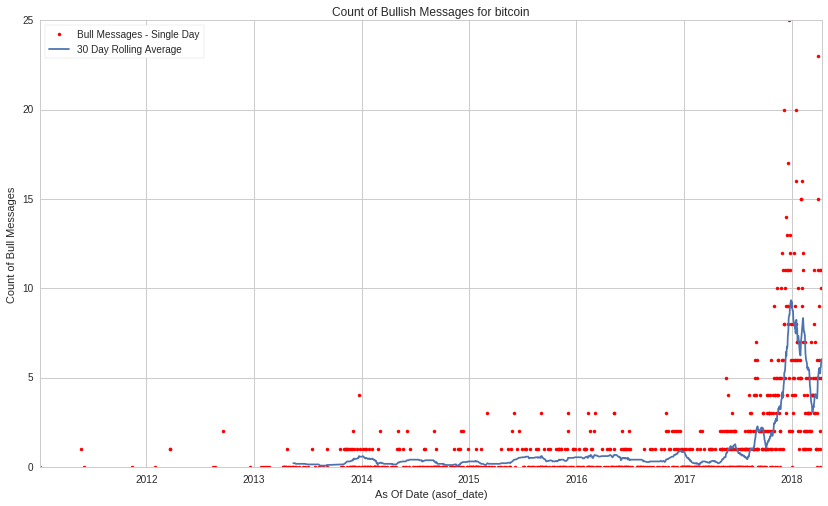

In [5]:
# Filtering for bitcoin
bitcoin = dataset[dataset.symbol == 'BTC']
bitcoin_df = odo(bitcoin.sort('asof_date'), pd.DataFrame)
plt.plot(bitcoin_df.asof_date, bitcoin_df.bull_scored_messages, marker='.', linestyle='None', color='r')
plt.plot(bitcoin_df.asof_date, pd.rolling_mean(bitcoin_df.bull_scored_messages, 30))
plt.xlabel("As Of Date (asof_date)")
plt.ylabel("Count of Bull Messages")
plt.title("Count of Bullish Messages for bitcoin")
plt.legend(["Bull Messages - Single Day", "30 Day Rolling Average"], loc=2)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  """


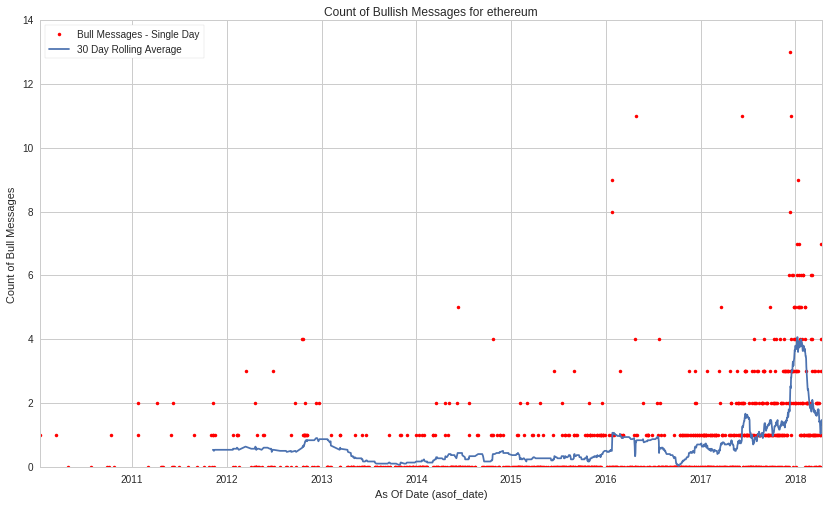

In [6]:
# Filtering for ethereum
ethereum = dataset[dataset.symbol == 'ETH']
ethereum_df = odo(ethereum.sort('asof_date'), pd.DataFrame)
plt.plot(ethereum_df.asof_date, ethereum_df.bull_scored_messages, marker='.', linestyle='None', color='r')
plt.plot(ethereum_df.asof_date, pd.rolling_mean(ethereum_df.bull_scored_messages, 30))
plt.xlabel("As Of Date (asof_date)")
plt.ylabel("Count of Bull Messages")
plt.title("Count of Bullish Messages for ethereum")
plt.legend(["Bull Messages - Single Day", "30 Day Rolling Average"], loc=2)

In [ ]:
# Dates of interest 
start_date = '2015-08-07'
end_date = '2018-04-12'

In [7]:
# Drop hh:min:sec from time-stamp
bitcoin_df['Date'] = bitcoin_df['asof_date'].dt.strftime('%Y-%m-%d')
bitcoin_df = bitcoin_df.assign(Date=pd.to_datetime(bitcoin_df['Date']))

bitcoin_df = bitcoin_df[bitcoin_df['Date']>=start_date]
bitcoin_df = bitcoin_df[bitcoin_df['Date']<=end_date]

bitcoin_df.set_index('Date', inplace=True)

all_dates = pd.date_range(start_date, end_date)
bitcoin_df = bitcoin_df.reindex(all_dates, fill_value=0)


bitcoin_df.drop(['source', 'symbol', 'sid', 'asof_date', 'timestamp'], axis=1, inplace=True)
bitcoin_df.reset_index(level=0, inplace=True)

bitcoin_df.rename(index=str, columns={"index": "Date"}, inplace=True)

bitcoin_df.to_pickle("bitcoin_stocktwits.pkl")

ValueError: labels ['source' 'symbol' 'sid' 'asof_date' 'timestamp'] not contained in axis

In [14]:
# Drop hh:min:sec from time-stamp
ethereum_df['Date'] = ethereum_df['asof_date'].dt.strftime('%Y-%m-%d')
ethereum_df = ethereum_df.assign(Date=pd.to_datetime(ethereum_df['Date']))

ethereum_df = ethereum_df[ethereum_df['Date']>=start_date]
ethereum_df = ethereum_df[ethereum_df['Date']<=end_date]

ethereum_df.set_index('Date', inplace=True)

all_dates = pd.date_range(start_date, end_date)
ethereum_df = ethereum_df.reindex(all_dates, fill_value=0)


ethereum_df.drop(['source', 'symbol', 'sid', 'asof_date', 'timestamp'], axis=1, inplace=True)
ethereum_df.reset_index(level=0, inplace=True)

ethereum_df.rename(index=str, columns={"index": "Date"}, inplace=True)

# ethereum_df.to_pickle("ethereum_stocktwits.pkl")

In [15]:
ethereum_df.describe()

,bullish_intensity,bearish_intensity,bull_minus_bear,bull_scored_messages,bear_scored_messages,bull_bear_msg_ratio,total_scanned_messages
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.647815,0.351168,0.296647,0.773469,0.281633,0.258875,3.564286
std,0.914357,0.787820,1.071076,1.497601,0.676672,0.971283,5.842935
min,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.500000,0.000000,0.970000,1.000000,0.000000,0.000000,4.000000
max,3.220000,3.670000,3.040000,13.000000,7.000000,11.000000,50.000000


In [17]:
ethereum_df.tail()

,Date,bullish_intensity,bearish_intensity,bull_minus_bear,bull_scored_messages,bear_scored_messages,bull_bear_msg_ratio,total_scanned_messages
975,2018-04-08,0.000000,2.480000,-2.480000,0.0,1.0,0.0000,3.0
976,2018-04-09,0.670000,2.500000,-1.830000,1.0,1.0,1.0000,9.0
977,2018-04-10,1.220000,1.670000,-0.450000,4.0,1.0,4.0000,13.0
978,2018-04-11,1.710000,1.886667,-0.176667,7.0,3.0,2.3333,26.0
979,2018-04-12,1.323333,2.900000,-1.576667,3.0,1.0,3.0000,29.0


In [18]:
ethereum_df.to_csv()

SandboxViolation: Blacklisted attribute within module to_csv